In [138]:
from pymdp import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Auxilaary Functions, plotting

In [139]:
def plot_likelihood(matrix, xlabels = list(range(9)), ylabels = list(range(9)), title_str = "Likelihood distribution (A)"):
    """
    Plots a 2-D likelihood matrix as a heatmap
    """

    if not np.isclose(matrix.sum(axis=0), 1.0).all():
      raise ValueError("Distribution not column-normalized! Please normalize (ensure matrix.sum(axis=0) == 1.0 for all columns)")
    
    fig = plt.figure(figsize = (6,6))
    ax = sns.heatmap(matrix, xticklabels = xlabels, yticklabels = ylabels, cmap = 'gray', cbar = False, vmin = 0.0, vmax = 1.0)
    plt.title(title_str)
    plt.show()

def plot_grid(grid_locations, num_x = 3, num_y = 3 ):
    """
    Plots the spatial coordinates of GridWorld as a heatmap, with each (X, Y) coordinate 
    labeled with its linear index (its `state id`)
    """

    grid_heatmap = np.zeros((num_x, num_y))
    for linear_idx, location in enumerate(grid_locations):
      y, x = location
      grid_heatmap[y, x] = linear_idx
    sns.set(font_scale=1.5)
    sns.heatmap(grid_heatmap, annot=True, cbar = False, fmt='.0f', cmap='crest')

def plot_point_on_grid(state_vector, grid_locations):
    """
    Plots the current location of the agent on the grid world
    """
    state_index = np.where(state_vector)[0][0]
    y, x = grid_locations[state_index]
    grid_heatmap = np.zeros((3,3))
    grid_heatmap[y,x] = 1.0
    sns.heatmap(grid_heatmap, cbar = False, fmt='.0f')

def plot_beliefs(belief_dist, title_str=""):
    """
    Plot a categorical distribution or belief distribution, stored in the 1-D numpy vector `belief_dist`
    """

    if not np.isclose(belief_dist.sum(), 1.0):
      raise ValueError("Distribution not normalized! Please normalize")

    plt.grid(zorder=0)
    plt.bar(range(belief_dist.shape[0]), belief_dist, color='r', zorder=3)
    plt.xticks(range(belief_dist.shape[0]))
    plt.title(title_str)
    plt.show()

Practicing categorical distribution

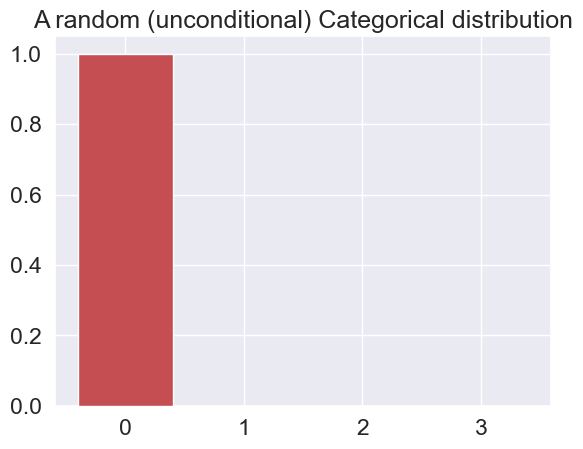

In [140]:
my_cat=np.array([1,0,0,0]).T
my_cat=utils.norm_dist(my_cat)
samples_outcome=utils.sample(my_cat)
plot_beliefs(my_cat, title_str = "A random (unconditional) Categorical distribution")

Conditional Categorical Variable


$$ \begin{align}
P(X | Y)
\end{align}
$$

In [141]:
p_x_given_y=utils.norm_dist(np.array([[1,2,3,4],[1,2,3,4],[1,2,3,5]]))
p_x_given_y
#normalise:

array([[0.33333333, 0.33333333, 0.33333333, 0.30769231],
       [0.33333333, 0.33333333, 0.33333333, 0.30769231],
       [0.33333333, 0.33333333, 0.33333333, 0.38461538]])

taking expectations



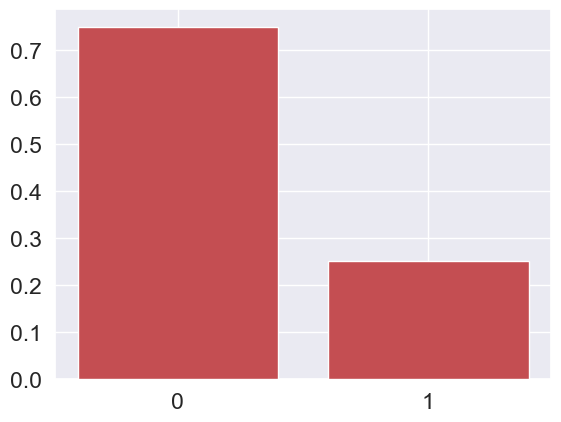

In [142]:
p_y=utils.norm_dist(np.array([3,1]))
plot_beliefs(p_y)

In [143]:
p_y = np.array([0.75, 0.25]) # this is already normalized - you don't need to `utils.norm_dist()` it!

# the columns here are already normalized - you don't need to `utils.norm_dist()` it!
p_x_given_y = np.array([[0.6, 0.5],
                        [0.15, 0.41], 
                        [0.25, 0.09]])

E_x_wrt_y=p_x_given_y.dot(p_y)
print(f'Integral: {E_x_wrt_y.sum().round(3)}')

Integral: 1.0


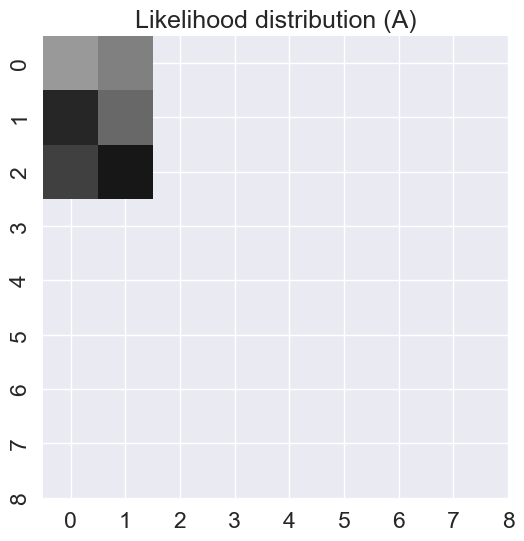

In [144]:
plot_likelihood(p_x_given_y)

Simple Gridworld Environment

In [145]:
import itertools

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


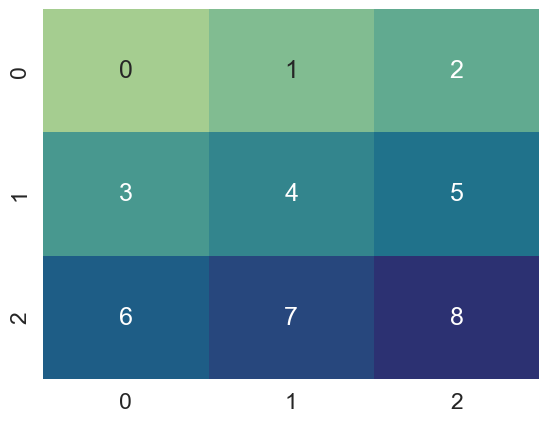

In [146]:
""" Create  the grid locations in the form of a list of (Y, X) tuples -- HINT: use itertools """
grid_locations = list(itertools.product(range(3), repeat = 2))
print(grid_locations)
plot_grid(grid_locations,num_x=3,num_y=3)

Generative Model: A,B,C,D

- A matrix, P(o|s)

In [147]:
""" Create variables for the storing the dimensionalities of the hidden states and the observations """

n_states = len(grid_locations)
n_observations = len(grid_locations)

print(f'Dimensionality of hidden states: {n_states}')
print(f'Dimensionality of observations: {n_observations}')

Dimensionality of hidden states: 9
Dimensionality of observations: 9


In [148]:

A = np.zeros( (n_states, n_observations) )

#empty matrix, initialised

In [149]:
""" Create an umambiguous or 'noise-less' mapping between hidden states and observations """

np.fill_diagonal(A, 1.0)

# alternative:
# A = np.eye(n_observations, n_states)

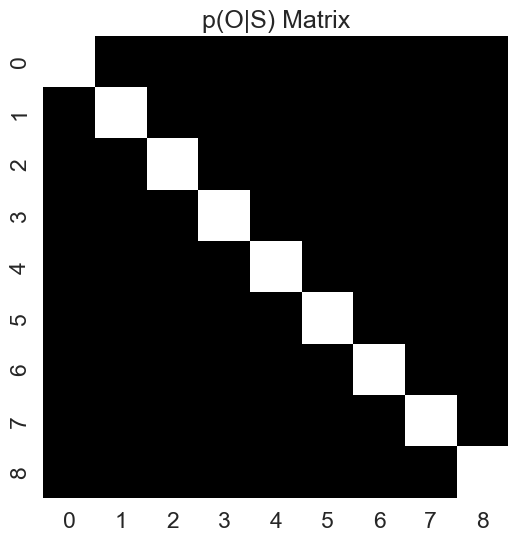

In [150]:
plot_likelihood(A,title_str="p(O|S) Matrix")

In [151]:
A_noisy = A.copy()

# this line says: the probability of seeing yourself in location 0, given you're in location 0, is 1/3, AKA P(o == 0 | s == 0) = 0.3333....
A_noisy[0,0] = 1 / 3.0 # corresponds to location (0,0)

# this line says: the probability of seeing yourself in location 1, given you're in location 0, is 1/3, AKA P(o == 1 | s == 0) = 0.3333....
A_noisy[1,0] = 1 / 3.0 # corresponds to one step to the right from (0, 1)

# this line says: the probability of seeing yourself in location 3, given you're in location 0, is 1/3, AKA P(o == 3 | s == 0) = 0.3333....
A_noisy[3,0] = 1 / 3.0 # corresponds to one step down from (1, 0)

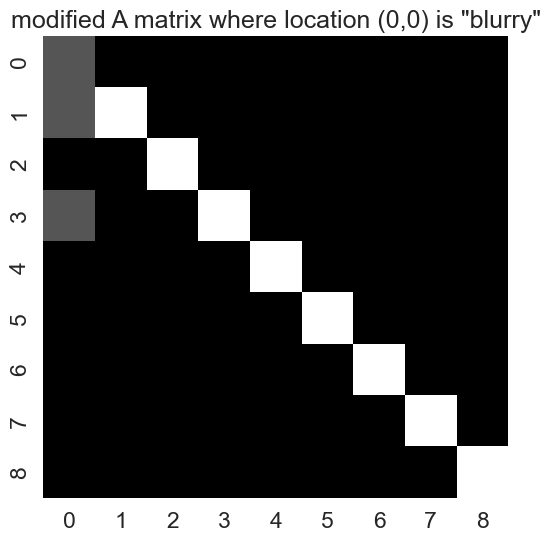

In [152]:
plot_likelihood(A_noisy, title_str = 'modified A matrix where location (0,0) is "blurry"')

In [153]:
""" Let's make ake one grid location "ambiguous" in the sense that it could be easily confused with neighbouring locations """
my_A_noisy = A_noisy.copy()

# locations 3 and 7 are the nearest neighbours to location 6
my_A_noisy[3,6] = 1.0 / 3.0
my_A_noisy[6,6] = 1.0 / 3.0
my_A_noisy[7,6] = 1.0 / 3.0

# Alternatively: you could have the probability spread among locations 3, 4, 6, and 7. This is basically saying, that whole lower-left corner of grid-world is blurry, if you're in location 6
# Remember to make sure the A matrix is column normalized. So if you do it this way, with the probabilities spread among 4 perceived locations, then you'll have to make sure the probabilities sum to 1.0
# my_A_noisy[3,6] = 1.0 / 4.0
# my_A_noisy[4,6] = 1.0 / 4.0
# my_A_noisy[6,6] = 1.0 / 4.0
# my_A_noisy[7,6] = 1.0 / 4.0

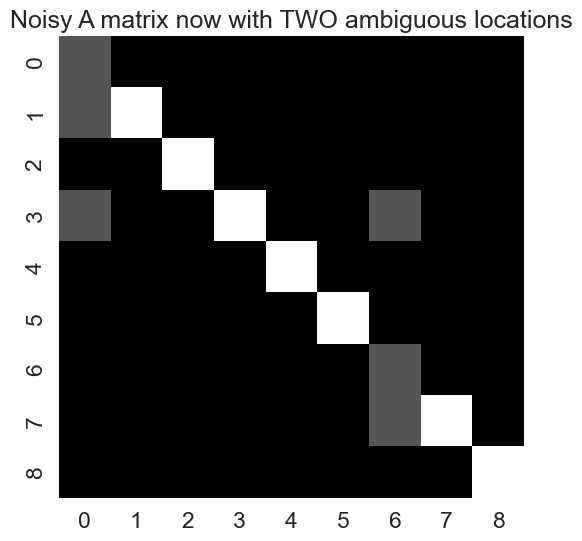

In [154]:
plot_likelihood(my_A_noisy, title_str = "Noisy A matrix now with TWO ambiguous locations")

### 2. The **B** matrix or $P(s_{t}\mid s_{t-1}, u_{t-1})$.

In [155]:
#Defined Actions

In [156]:
actions=["UP","DOWN","LEFT","RIGHT","STAY"]
def create_B_matrix():
    B=np.zeros((len(grid_locations),len(grid_locations),len(actions)))
    for action_id,action_label in enumerate(actions):
        for curr_state,grid_location in enumerate(grid_locations):
            y, x=grid_location
            if action_label == "UP":
                next_y = y - 1 if y > 0 else y 
                next_x = x
            elif action_label == "DOWN":
                next_y = y + 1 if y < 2 else y 
                next_x = x
            elif action_label == "LEFT":
                next_x = x - 1 if x > 0 else x 
                next_y = y
            elif action_label == "RIGHT":
                next_x = x + 1 if x < 2 else x 
                next_y = y
            elif action_label == "STAY":
                next_x = x
                next_y = y 
            new_location = (next_y, next_x)
            next_state = grid_locations.index(new_location)
            B[next_state, curr_state, action_id] = 1.0
    return B

B = create_B_matrix()


In [157]:
print([i for i in enumerate(actions)])

[(0, 'UP'), (1, 'DOWN'), (2, 'LEFT'), (3, 'RIGHT'), (4, 'STAY')]


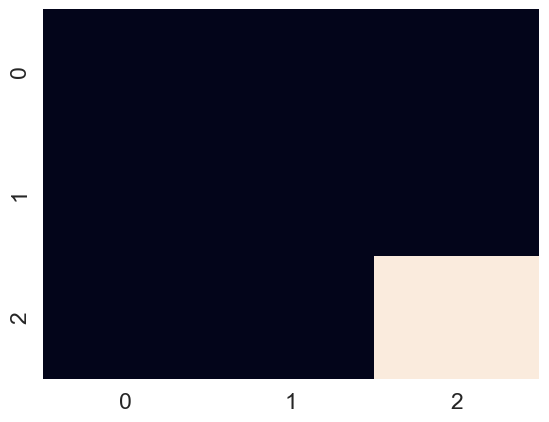

In [158]:
starting_location =(2,2)

state_index = grid_locations.index(starting_location)

starting_state=utils.onehot(state_index,n_states)

plot_point_on_grid(starting_state,grid_locations)

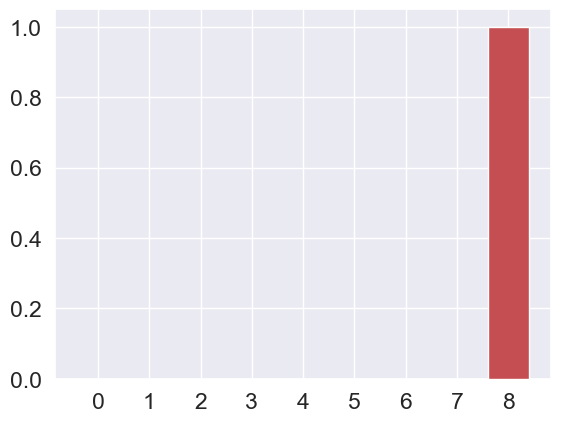

In [159]:
plot_beliefs(starting_state)

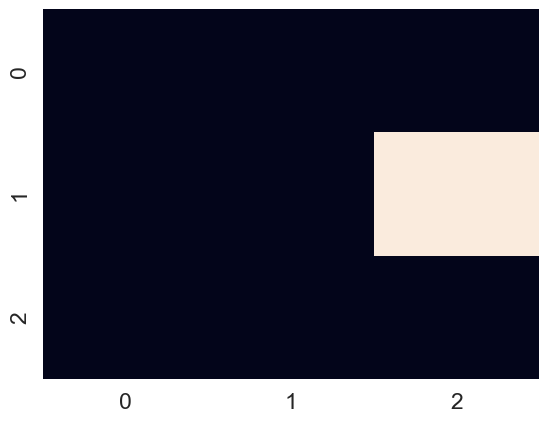

In [160]:
up_action_idx=actions.index("UP")

next_state= B[:,:,up_action_idx].dot(starting_state)

plot_point_on_grid(next_state,grid_locations)

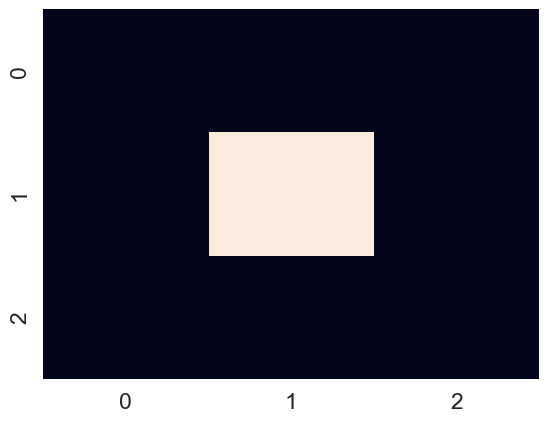

In [161]:
prev_state=next_state.copy()
left_action_idx=actions.index("LEFT")
next_state = B[:,:,left_action_idx].dot(prev_state)
plot_point_on_grid(next_state,grid_locations)

C vector or $\tilde{P}(o)$, prior over observations

In [162]:
n_observations

9

In [163]:
desired_location=(2,2)

desired_location_idx=grid_locations.index(desired_location)

C[desired_location]=1  


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

D matrix, prior over hidden states, P(s)

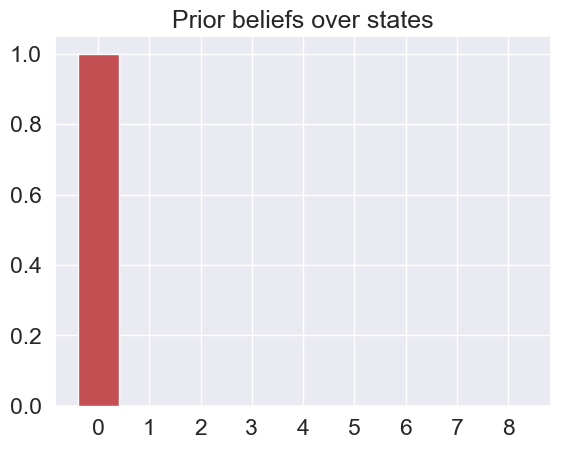

In [ ]:
""" Create a D vector, basically a belief that the agent has about its own starting location """

# create a one-hot / certain belief about initial state
D = utils.onehot(0, n_states)

# demonstrate hwo belief about initial state can also be uncertain / spread among different possible initial states
# alternative, where you have a degenerate/noisy prior belief
# D = utils.norm_dist(np.ones(n_states))

""" Let's look at the prior over hidden states """
plot_beliefs(D, title_str = "Prior beliefs over states")

So agents believes it is in state 0 with 100%, but it desired state 8%

Hidden State Inference

In [ ]:
help(maths)

Help on module pymdp.maths in pymdp:

NAME
    pymdp.maths - Functions

DESCRIPTION
    __author__: Conor Heins, Alexander Tschantz, Brennan Klein

FUNCTIONS
    calc_free_energy(qs, prior, n_factors, likelihood=None)
        Calculate variational free energy
        @TODO Primarily used in FPI algorithm, needs to be made general

    compute_accuracy(log_likelihood, qs)
        Function that computes the accuracy term of the variational free energy. This is essentially a stripped down version of `spm_dot` above,
        with fewer conditions / dimension handling in the beginning.

    dirichlet_log_evidence(q_dir, p_dir, r_dir)
        Bayesian model reduction and log evidence calculations for Dirichlet hyperparameters
        This is a NumPY translation of the MATLAB function `spm_MDP_log_evidence.m` from the
        DEM package of spm.

        Description (adapted from MATLAB docstring)
        This function computes the negative log evidence of a reduced model of a
        Categor

In [ ]:
from pymdp.maths import softmax
from pymdp.maths import spm_log_single as log_stable

In [ ]:
def infer_states(observation_index,A,prior):
    return softmax(log_stable(prior)+log_stable(A[observation_index,:]))


In [ ]:
qs_past=utils.onehot(4,n_states)
last_Action="UP"
action_id=actions.index(last_Action)
prior=B[:,:,action_id].dot(qs_past)

#chose the observation index

observations_index=1

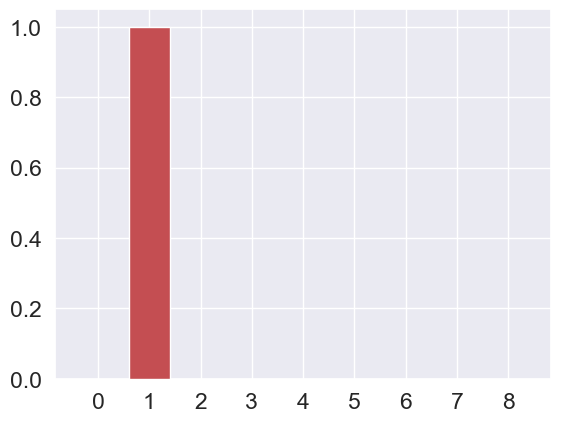

In [ ]:
qs_new=infer_states(observations_index,A,prior)
plot_beliefs(qs_new)

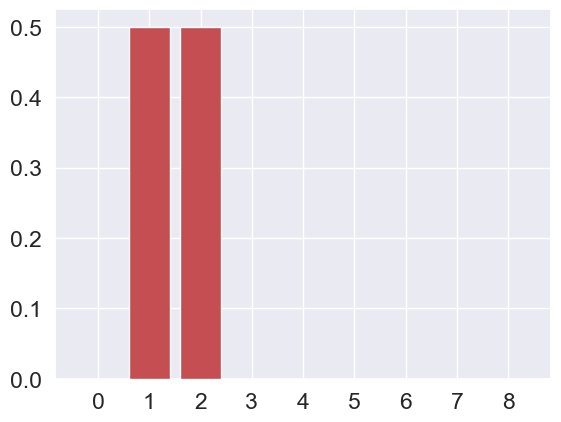

In [ ]:
""" Get an observation that 'conflicts' with the prior """
observation_index = 2 # this is like the agent is seeing itself in location (0, 2)
qs_new = infer_states(observation_index, A, prior)
plot_beliefs(qs_new)

Action Selections

Now we'll write function to compute the expected states Q(s_t+1|u_t), expected observations Q(o_t+1|u_t), the entropy of P(o|s): H[A], and the KL Divergence between expected observations and and prior preferences C

In [ ]:
""" Component functionf for computing free energy"""

def get_expected_states(B,qs_current,action):
    return B[:,:,action].dot(qs_current)

def get_expected_observations(A,qs_u):
    return A.dot(qs_u)
    
def entropy(A):
    return -(A*log_stable(A)).sum(axis=0)

def kl_divergence(qo_u, C):
    return (log_stable(qo_u)-log_stable(C)).dot(qo_u)

Simulation kind of begins

Begins at 1,1; and have correct belief about its state in the starting

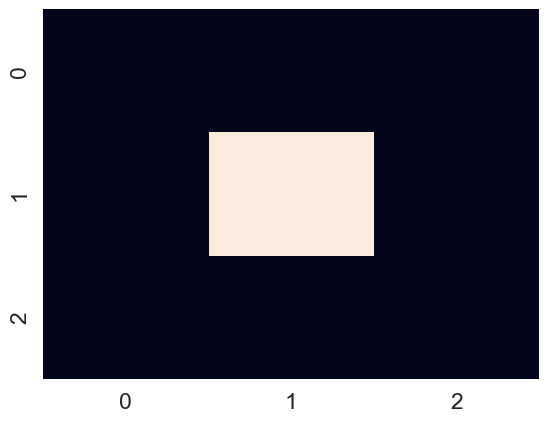

In [ ]:
state_idx = grid_locations.index((1,1))
state_vector = utils.onehot(state_idx,n_states)
plot_point_on_grid(state_vector,grid_locations)

Accurate belief about the location

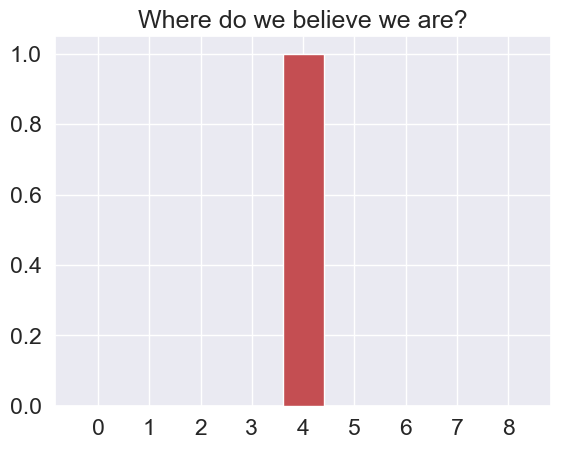

In [ ]:
qs_current = state_vector.copy()
plot_beliefs(qs_current, title_str ="Where do we believe we are?")

We prefer state 1,2

assume that state (1,2) is preferred

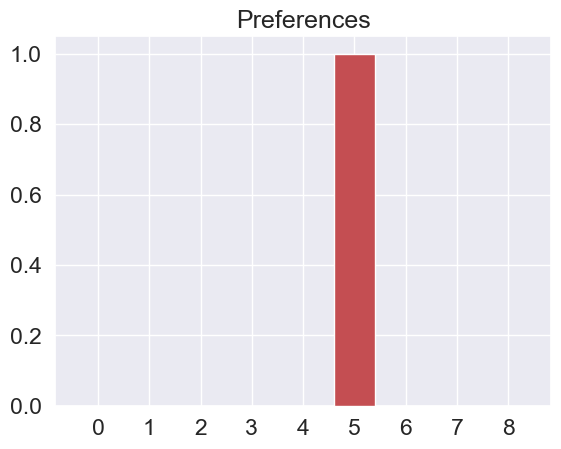

In [ ]:
desired_idx=grid_locations.index((1,2))
C= utils.onehot(desired_idx,n_observations)

plot_beliefs(C,title_str="Preferences")

In [ ]:
left_idx = actions.index("LEFT")
right_idx = actions.index("RIGHT")
up_idx = actions.index("UP")
down_idx = actions.index("DOWN")

In [ ]:
G=np.zeros(2)

"""G for moving left"""

qs_u_left = get_expected_states(B,qs_current,left_idx)

H_A=entropy(A)
qo_u_left = get_expected_observations(A,qs_u_left)

predict_uncertainity_left=H_A.dot(qs_u_left)
predict_divergence_left=kl_divergence(qo_u_left,C)
G[0]=predict_divergence_left+predict_uncertainity_left

"""G for moving right"""

qs_u_rt = get_expected_states(B,qs_current,right_idx)

H_A=entropy(A)
qo_u_rt = get_expected_observations(A,qs_u_rt)

predict_uncertainity_rt=H_A.dot(qs_u_rt)
predict_divergence_rt=kl_divergence(qo_u_rt,C)
G[1]=predict_divergence_rt+predict_uncertainity_rt


In [ ]:
G1=np.zeros(4)

"""G for moving left"""

qs_u_left = get_expected_states(B,qs_current,left_idx)

H_A=entropy(A)
qo_u_left = get_expected_observations(A,qs_u_left)

predict_uncertainity_left=H_A.dot(qs_u_left)
predict_divergence_left=kl_divergence(qo_u_left,C)
G1[0]=predict_divergence_left+predict_uncertainity_left

"""G for moving right"""

qs_u_rt = get_expected_states(B,qs_current,right_idx)

H_A=entropy(A)
qo_u_rt = get_expected_observations(A,qs_u_rt)

predict_uncertainity_rt=H_A.dot(qs_u_rt)
predict_divergence_rt=kl_divergence(qo_u_rt,C)
G1[1]=predict_divergence_rt+predict_uncertainity_rt


"""G for moving up"""

qs_u_up = get_expected_states(B,qs_current,up_idx)

H_A=entropy(A)
qo_u_up = get_expected_observations(A,qs_u_up)

predict_uncertainity_up=H_A.dot(qs_u_up)
predict_divergence_up=kl_divergence(qo_u_up,C)
G1[2]=predict_divergence_up+predict_uncertainity_up

"""G for moving down"""

qs_u_rt = get_expected_states(B,qs_current,down_idx)

H_A=entropy(A)
qo_u_rt = get_expected_observations(A,qs_u_rt)

predict_uncertainity_rt=H_A.dot(qs_u_rt)
predict_divergence_rt=kl_divergence(qo_u_rt,C)
G1[2]=predict_divergence_rt+predict_uncertainity_rt

In [ ]:
G1

array([36.84136149,  0.        , 36.84136149,  0.        ])

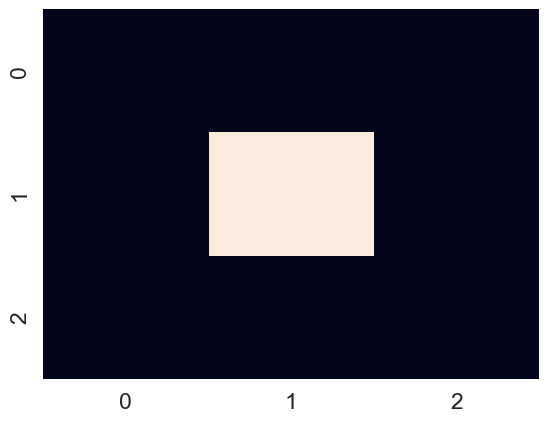

In [ ]:
plot_point_on_grid(qs_current,grid_locations)

In [ ]:
Q_u=softmax(-G)
print(f'Probability of moving left: {Q_u[0]}')
print(f'Probability of moving right: {Q_u[1]}')

Probability of moving left: 9.999999999999965e-17
Probability of moving right: 1.0


In [ ]:
def calc_G(A,B,C,qs_current,actions):
    G=np.zeros(len(actions))
    H_A = entropy(A)
    
    for action_i in range(len(actions)):
        qs_u=get_expected_states(B,qs_current,action_i)
        qo_u=get_expected_observations(A,qs_u)
        
        pred_uncertainity = H_A.dot(qs_u)
        pred_div = kl_divergence(qo_u,C)
        G[action_i]=pred_uncertainity+pred_div
    return G

In [ ]:
utils.sample

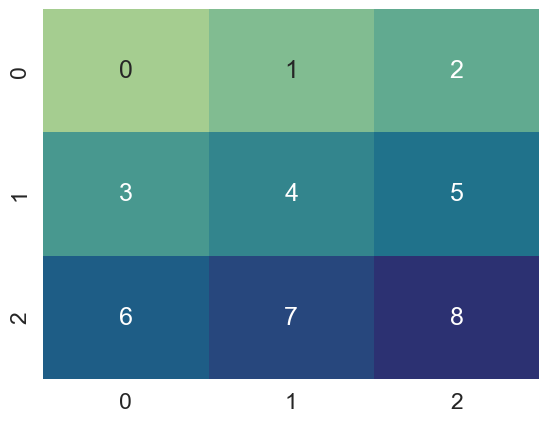

In [ ]:
plot_grid(grid_locations)

In [ ]:
qs_current=utils.onehot(5,n_states)
G=calc_G(A,B,C,qs_current,actions)
action_probs=softmax(-G)
print(G)
print(action_probs)
# actions[actions.index(max(action_probs))]

[36.84136149 36.84136149 36.84136149  0.          0.        ]
[5.e-17 5.e-17 5.e-17 5.e-01 5.e-01]


In [ ]:
actions

['UP', 'DOWN', 'LEFT', 'RIGHT', 'STAY']

Grid World Dynamics

In [ ]:
class GridWorldEnv():
    def __init__(self,starting_state =(0,0)):
        self.init_state = starting_state
        self.current_state = self.init_state
        print(f'Starting state is {starting_state}')
    
    def step(self,action_label):
        
        (Y, X) = self.current_state

        if action_label == "UP": 
          
          Y_new = Y - 1 if Y > 0 else Y
          X_new = X

        elif action_label == "DOWN": 

          Y_new = Y + 1 if Y < 2 else Y
          X_new = X

        elif action_label == "LEFT": 
          Y_new = Y
          X_new = X - 1 if X > 0 else X

        elif action_label == "RIGHT": 
          Y_new = Y
          X_new = X +1 if X < 2 else X

        elif action_label == "STAY":
          Y_new, X_new = Y, X 
        
        self.current_state=(Y_new,X_new)
        
        obs = self.current_state #observation model is 'perfect'
        return obs
      
    def reset(self):
        self.current_state = self.init_state
        print(f'Re-initialized location to {self.init_state}')
        obs = self.current_state
        print(f'..and sampled observation {obs}')

        return obs

Genprocess

In [166]:
env=GridWorldEnv(starting_state=(1,2))

Starting state is (1, 2)


GenModel

In [167]:
A=np.eye(n_observations,n_states)

B=create_B_matrix()

C= utils.onehot(grid_locations.index((2,2)),n_observations)

D= utils.onehot(grid_locations.index((1,2)),n_states)

actions=["UP","DOWN","LEFT","RIGHT","STAY"]


AII Simulation, without planning

Re-initialized location to (1, 2)
..and sampled observation (1, 2)
Time 0: Agent observes itself in location: (1, 2)


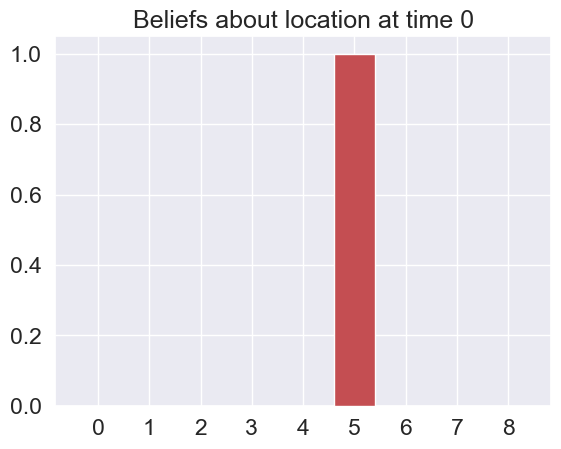

[1.e-16 1.e+00 1.e-16 1.e-16 1.e-16]
DOWN
Time 1: Agent observes itself in location: (2, 2)


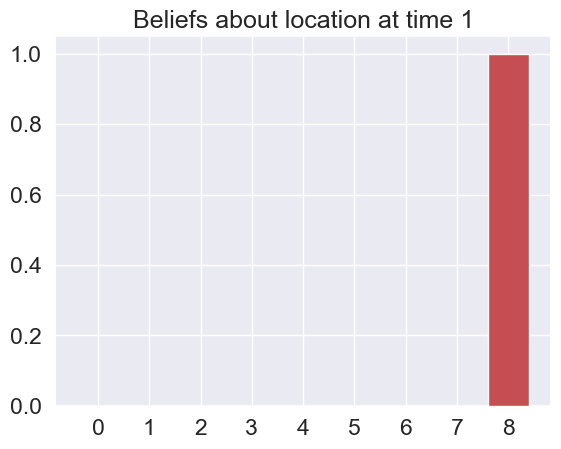

[3.33333333e-17 3.33333333e-01 3.33333333e-17 3.33333333e-01
 3.33333333e-01]
RIGHT
Time 2: Agent observes itself in location: (2, 2)


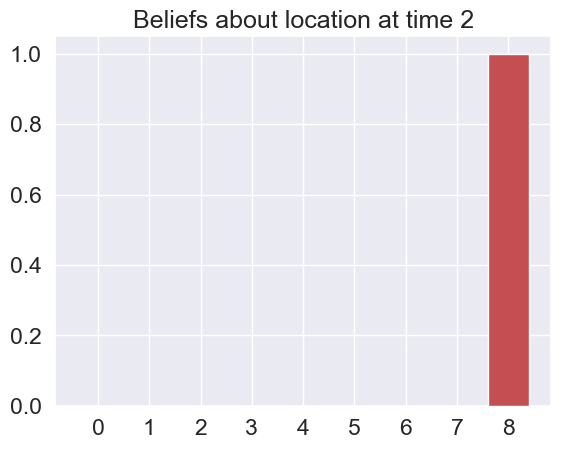

[3.33333333e-17 3.33333333e-01 3.33333333e-17 3.33333333e-01
 3.33333333e-01]
RIGHT
Time 3: Agent observes itself in location: (2, 2)


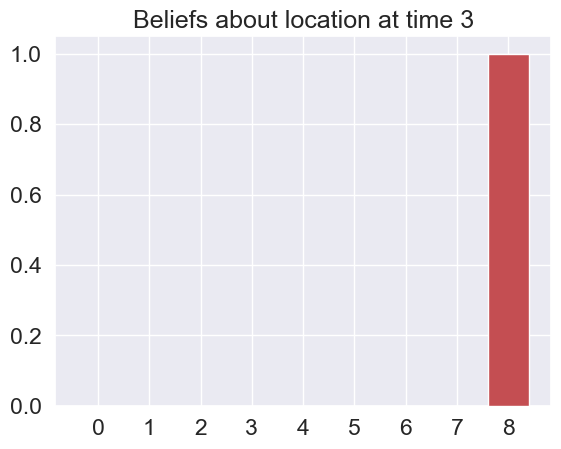

[3.33333333e-17 3.33333333e-01 3.33333333e-17 3.33333333e-01
 3.33333333e-01]
RIGHT
Time 4: Agent observes itself in location: (2, 2)


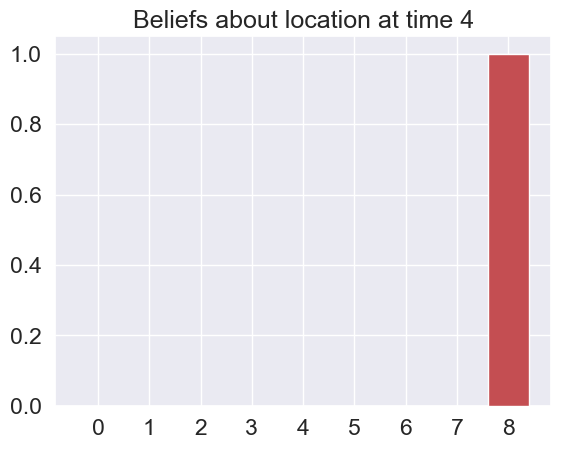

[3.33333333e-17 3.33333333e-01 3.33333333e-17 3.33333333e-01
 3.33333333e-01]
DOWN


In [168]:
def run_active_inference_loop(A,B,C,D,actions,env,T=5):
    prior=D.copy() #initial prior is the D vector
    
    obs = env.reset()
    for t in range(T):
        print(f'Time {t}: Agent observes itself in location: {obs}')
        obs_idx = grid_locations.index(obs)
        
        qs_current = infer_states(obs_idx,A,prior) # VFE minimisation
        
        plot_beliefs(qs_current,title_str = f"Beliefs about location at time {t}")
        
        G = calc_G(A,B,C,qs_current,actions)
        
        Q_u=softmax(-G)
        print(Q_u)
        
        chosen_action = utils.sample(Q_u)
        
        prior = B[:,:,chosen_action].dot(qs_current)
        
        action_label = actions[chosen_action]
        print(action_label)
        
        obs = env.step(action_label)
    return

qs=run_active_inference_loop(A,B,C,D,actions,env,T=5)

upto here it is like equivalent to vfe wala scene, now enters planning


Planning

Upto now, we are finding G upto 1 time stemp ahead, 


enters multi step policies


In [171]:
from pymdp.control import construct_policies

In [181]:
policy_len = 4
n_actions = len(actions)

# we have to wrap `n_states` and `n_actions` in a list for reasons that will become clear in Part II
all_policies = construct_policies([n_states], [n_actions], policy_len = policy_len)

print(f'Total number of policies for {n_actions} possible actions and a planning horizon of {policy_len}: {len(all_policies)}')

Total number of policies for 5 possible actions and a planning horizon of 4: 625


In [182]:
def calculate_G_policies(A,B,C,qs_current,policies):
    G=np.zeros(len(policies))
    H_A=entropy(A)
    
    for policy_id,policy in enumerate(policies):
        t_horizon = policy.shape[0]
        
        G_pi = 0
        
        for t in range(t_horizon):
            
            action = policy[t,0]
            
            if t==0:
                qs_prev = qs_current
            else:
                qs_prev=qs_pi_t 
            qs_pi_t=get_expected_states(B,qs_prev,action)
            qo_pi_t=get_expected_observations(A,qs_pi_t)
            
            kld = kl_divergence(qo_pi_t,C)
            
            G_pi_t=H_A.dot(qs_pi_t) +kld
            G_pi +=G_pi_t
        
        G[policy_id]+=G_pi
        
    return G

 
                

function to write the action posterior

In [183]:
def compute_prob_actions(actions,policies,Q_pi):
    P_u = np.zeros(len(actions))
    
    for policy_id, policy in enumerate(policies):
        P_u[int(policy[0,0])] += Q_pi[policy_id]
        
    P_u = utils.norm_dist(P_u)
    return P_u    

Starting state is (0, 0)
Re-initialized location to (0, 0)
..and sampled observation (0, 0)
Time 0: Agent observes itself in location: (0, 0)


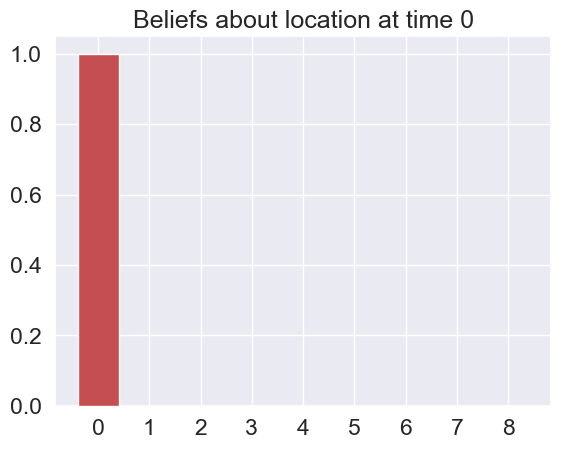

DOWN
Time 1: Agent observes itself in location: (1, 0)


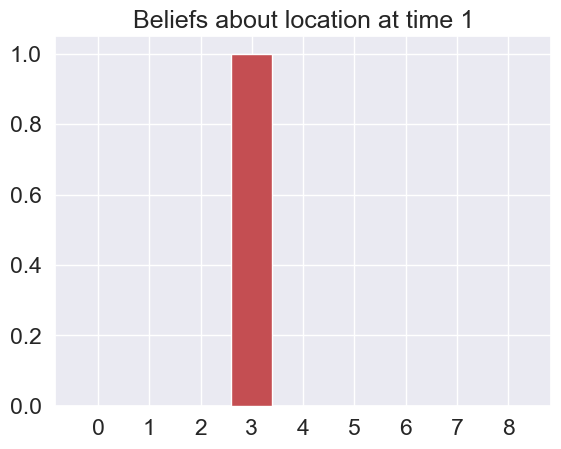

RIGHT
Time 2: Agent observes itself in location: (1, 1)


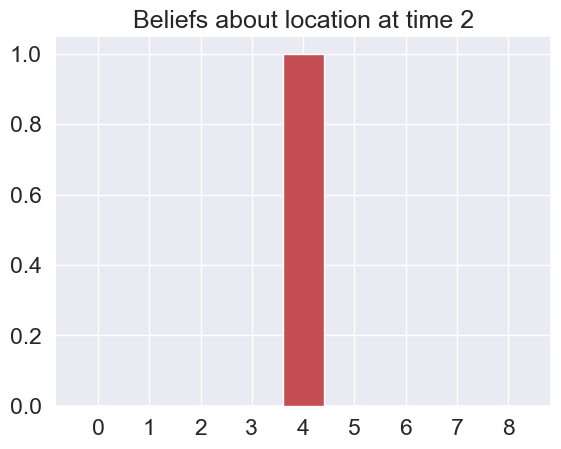

DOWN
Time 3: Agent observes itself in location: (2, 1)


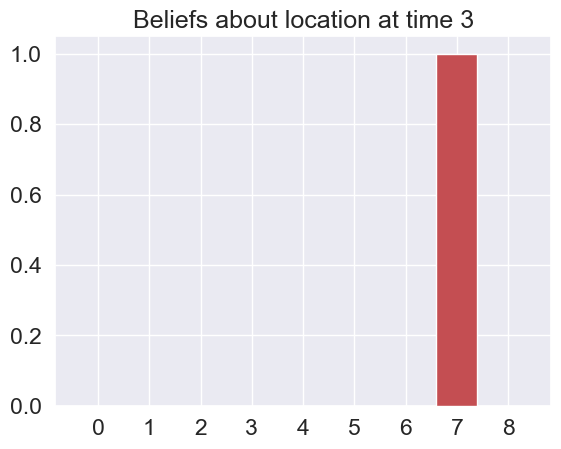

RIGHT
Time 4: Agent observes itself in location: (2, 2)


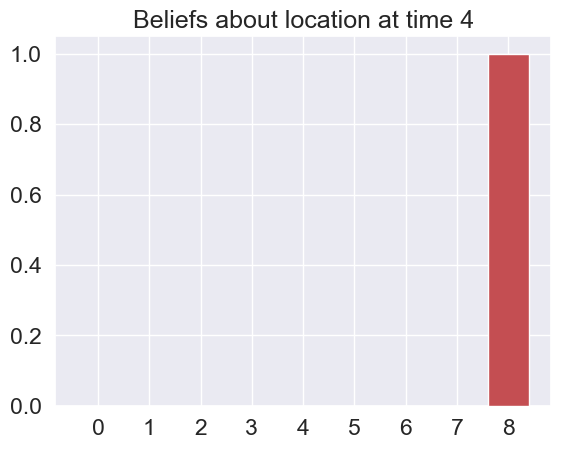

DOWN
Time 5: Agent observes itself in location: (2, 2)


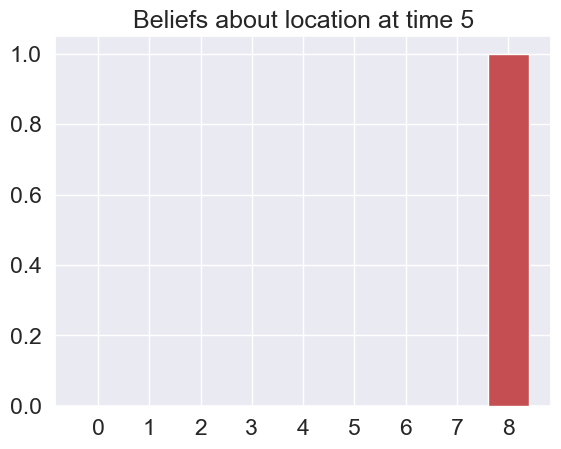

DOWN
Time 6: Agent observes itself in location: (2, 2)


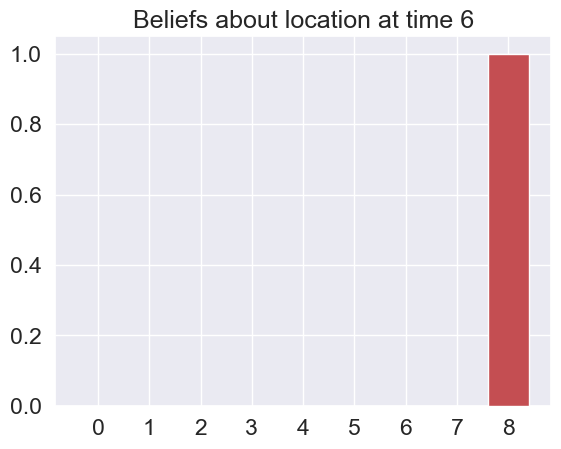

RIGHT
Time 7: Agent observes itself in location: (2, 2)


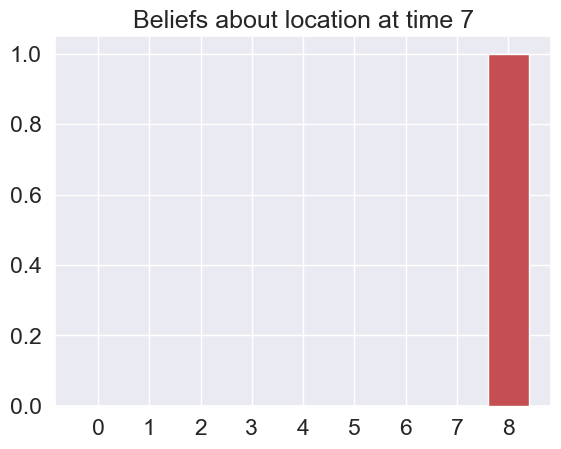

DOWN
Time 8: Agent observes itself in location: (2, 2)


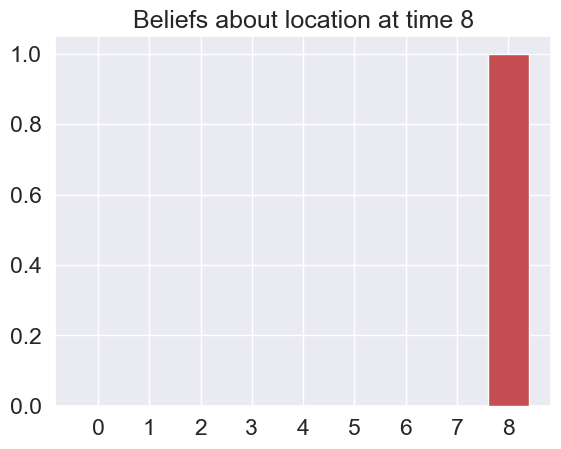

STAY
Time 9: Agent observes itself in location: (2, 2)


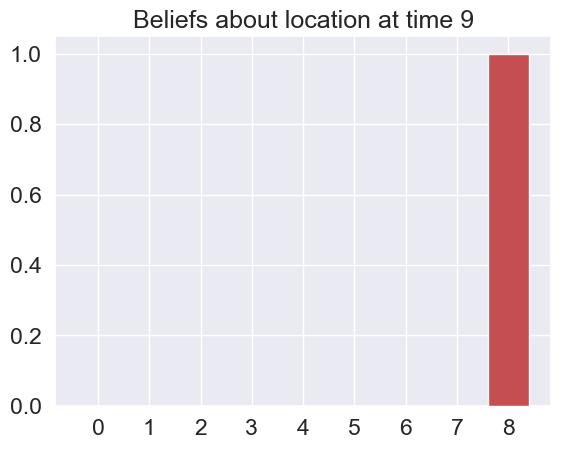

STAY


In [185]:
def actinf_with_planning(A,B,C,D,actions,n_actions,env,policy_len=2,T=5):
    prior=D.copy() #initial prior is the D vector
    
    obs = env.reset()
    
    policies = construct_policies([n_states],[n_actions],policy_len=policy_len)
    for t in range(T):
        print(f'Time {t}: Agent observes itself in location: {obs}')
        obs_idx = grid_locations.index(obs)
        
        qs_current = infer_states(obs_idx,A,prior) # VFE minimisation
        
        plot_beliefs(qs_current,title_str = f"Beliefs about location at time {t}")
        
        G = calculate_G_policies(A,B,C,qs_current,policies)
        
        Q_pi=softmax(-G)
        # print(Q_u)
        
        P_u = compute_prob_actions(actions,policies,Q_pi)
        
        chosen_action=utils.sample(P_u)
        
        
        prior = B[:,:,chosen_action].dot(qs_current)
        
        action_label = actions[chosen_action]
        print(action_label)
        
        obs = env.step(action_label)
    return
D = utils.onehot(grid_locations.index((0,0)), n_states) # let's have the agent believe it starts in location (0,0) (upper left corner) 
env = GridWorldEnv(starting_state = (0,0))
qs=actinf_with_planning(A,B,C,D,actions,n_actions,env,policy_len=3,T=10)